# Enhancing Book Discovery with Machine Learning-based Recommendation System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv('books.csv')
users = pd.read_csv('users.csv')
ratings = pd.read_csv('ratings.csv')

C:\Users\91976\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
books['Image-URL-M'][1]

'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg'

In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Exploratory data analysis (EDA)

In [6]:
# books 
print('shape of books ',books.shape)
print()
books.info()

shape of books  (271360, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
# user 
print('shape of users',users.shape)
print()
users.info()

shape of users (278858, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
# ratings
print('shape of rating',ratings.shape)
print()
ratings.info()

shape of rating (1149780, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


The dataset is reliable and can consider as a large dataset. we have 271360 books data and total registered users on the website areapproximately 278000 and they have given near about 11 lakh rating. hence we can say that the dataset we have is nice and reliable.

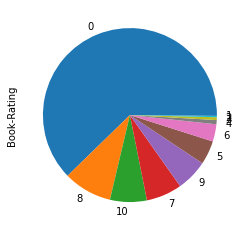

In [9]:
ratings['Book-Rating'].value_counts().plot(kind='pie');

It's common in recommendation systems to have implicit feedback data, where users do not explicitly provide ratings but their actions can be used as an indication of preference. In this case, a rating of 0 might represent a missing or unknown rating, which is often treated as "implicit negative feedback." It means that the users who have not provided any rating for a book are not necessarily indicating that they dislike the book; they might simply not have expressed any opinion about it.

In [10]:
# find the null value in books dataset
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [11]:
books['Year-Of-Publication'].value_counts().index.values

array([2002, 2001, 1999, 2000, 1998, 2003, 1997, 1996, 1995, 1994, 1993,
       1992, 1991, 1990, 1989, 1988, 1987, 2004, 1986, '1999', 1985,
       '2000', '2002', '1998', '2001', 1984, 0, '1997', '1996', 1983,
       '1995', 1982, '1994', '2003', '1993', '1992', '1991', 1981, '1990',
       '1989', '1988', 1980, '1987', '1986', 1979, 1978, '1985', 1977,
       '1984', '2004', '1983', 1976, '1982', '0', '1981', 1975, '1980',
       1974, '1979', 1973, '1978', 1972, '1977', '1976', '1975', 1971,
       '1974', 1970, '1973', 1969, '1972', '1971', 1968, '1970', 1967,
       1966, 1965, 1964, '1969', 1963, 1960, 1961, 1962, 1959, '1968',
       1958, 1957, '1965', 1953, 1954, 1955, '1960', 1956, '1961', '1966',
       '1962', '1967', '1964', '1963', 1951, '1956', 2005, 1940, '1959',
       1920, '1955', '1957', 1950, 1952, '1958', '2005', '1953', 1942,
       1930, 1946, '1952', 1947, 1911, '1950', '1911', 1949, '1951',
       '1954', '1940', 1941, 1923, 1929, 1901, 1939, 1938, 1948, 1943

The invalid or non-year values like '0' and '1376'.

In [12]:
# Step 1: Filter out invalid or non-year values
valid_years = books['Year-Of-Publication'].astype(str).str.isnumeric()
books = books[valid_years]

# Step 2: Convert the column data to integers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

# Step 3: Create a new datetime column from the integers representing years
books['Publication_Date'] = pd.to_datetime(books['Year-Of-Publication'], format='%Y', errors='coerce')

# Drop the old 'Year-Of-Publication' column if you don't need it anymore
books.drop(columns=['Year-Of-Publication'], inplace=True)

# Display the DataFrame to check the new datetime column
books = pd.DataFrame(books)

In [13]:
# Step 4: Create a new column with only the year part as integers
books['Year-Of-Publication'] = books['Publication_Date'].dt.year

In [14]:
books['Year-Of-Publication'].value_counts().index.values

array([2002., 1999., 2001., 2000., 1998., 1997., 2003., 1996., 1995.,
       1994., 1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986.,
       2004., 1985., 1984., 1983., 1982., 1981., 1980., 1979., 1978.,
       1977., 1976., 1975., 1974., 1973., 1972., 1971., 1970., 1969.,
       1968., 1966., 1967., 1965., 1964., 1960., 1961., 1963., 1962.,
       1959., 1958., 1957., 1956., 1955., 1953., 1954., 2005., 1951.,
       1940., 1952., 1920., 1950., 1911., 1942., 1947., 1946., 1930.,
       1949., 1923., 1941., 1939., 1948., 1945., 1943., 1901., 1938.,
       2030., 1936., 1929., 1937., 1932., 1944., 1933., 1935., 2006.,
       1900., 1931., 2020., 1927., 1921., 1922., 1909., 2011., 1925.,
       1926., 2010., 1924., 1902., 2050., 1928., 1904., 2012., 2024.,
       1897., 1919., 2008., 1934., 1910., 1806., 2021., 2038., 1906.,
       1908., 1914., 1917., 2026., 2037.])

In [15]:
# this all the invalid data at this time

books = books[~(books['Year-Of-Publication'] == 2037)]
books = books[~(books['Year-Of-Publication'] == 2026)] 
books = books[~(books['Year-Of-Publication'] == 2030)]
books = books[~(books['Year-Of-Publication'] == 2050)]
books = books[~(books['Year-Of-Publication'] == 2038)]

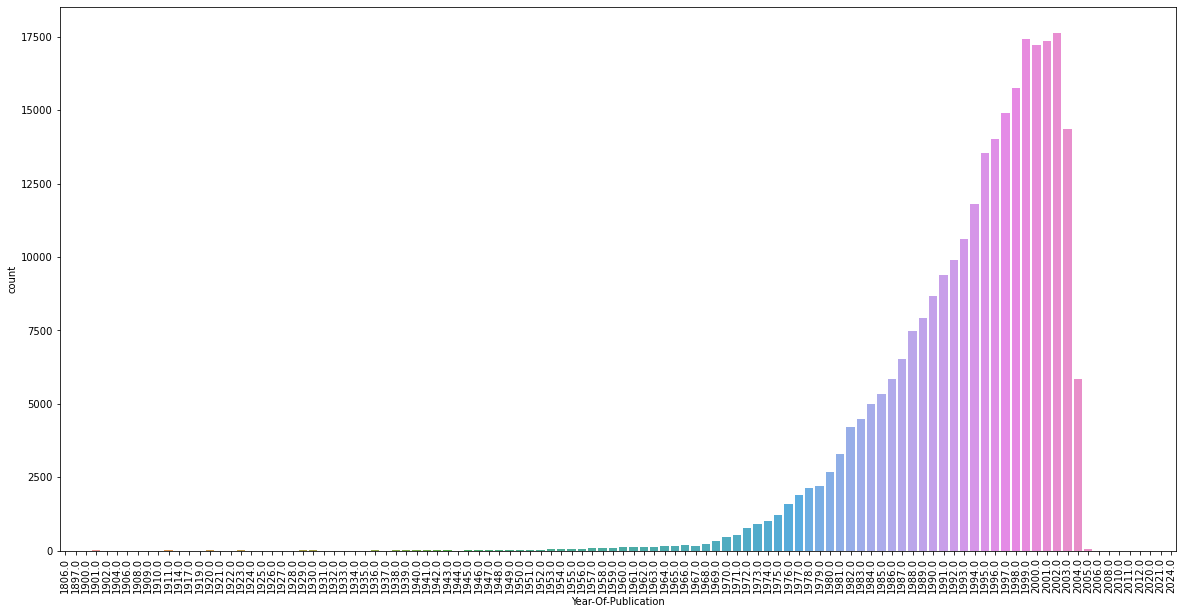

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x=books['Year-Of-Publication']);
plt.xticks(rotation=90)
plt.show()

The most books Year-of-Publication is between 1980-2004

<AxesSubplot:>

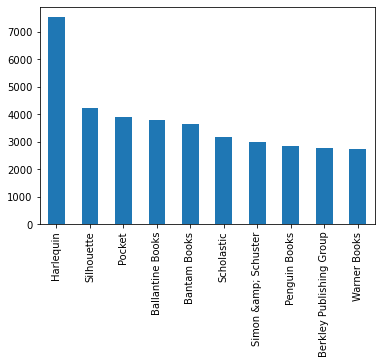

In [17]:
# top 10 Publisher
books['Publisher']. value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

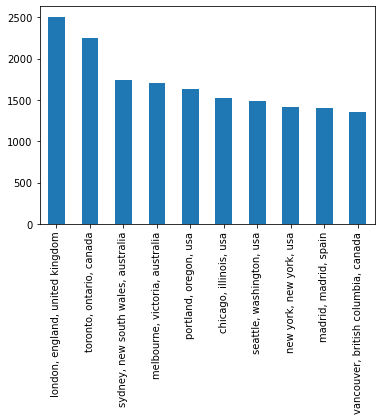

In [18]:
# top 10 user location 
users['Location'].value_counts().head(10).plot(kind='bar')

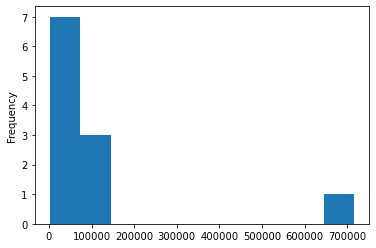

In [47]:
ratings['Book-Rating'].value_counts().plot(kind="hist");

# Popularity Based Recommender System

In [20]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [21]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241052,Ã?Â?lpiraten.,2
241053,Ã?Â?rger mit Produkt X. Roman.,4
241054,Ã?Â?sterlich leben.,1
241055,Ã?Â?stlich der Berge.,3


In [22]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241052,Ã?Â?lpiraten.,0.000000
241053,Ã?Â?rger mit Produkt X. Roman.,5.250000
241054,Ã?Â?sterlich leben.,7.000000
241055,Ã?Â?stlich der Berge.,2.666667


In [23]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241052,Ã?Â?lpiraten.,2,0.000000
241053,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241054,Ã?Â?sterlich leben.,1,7.000000
241055,Ã?Â?stlich der Berge.,3,2.666667


In [24]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [25]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]


In [26]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [27]:
# This Will Show all the top 50 Books
popular_df.head(50)

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


# Collaborative Filtering Based Recommender System

In [28]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [29]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [30]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [31]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [32]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [33]:
pt.fillna(0,inplace=True)

In [34]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
similarity_scores = cosine_similarity(pt)

In [37]:
similarity_scores.shape

(706, 706)

In [38]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [39]:
#Recommended Top 4 Books
recommend("Harry Potter and the Chamber of Secrets (Book 2)")
##Book Names:
#Harry Potter and the Chamber of Secrets (Book 2)
#Animal Farm
#The Handmaid's Tale
#Bastard Out of Carolina
#1st to Die: A Novel

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg']]

In [49]:
pt.index[54]

'At Home in Mitford (The Mitford Years)'

In [41]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [42]:
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publication_Date,Year-Of-Publication
0,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2002-01-01,2002.0
1,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,2001-01-01,2001.0
2,0060973129,Decision in Normandy,Carlo D'Este,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,1991-01-01,1991.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,1999-01-01,1999.0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1999-01-01,1999.0
...,...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,1993-01-01,1993.0
271356,0525447644,From One to One Hundred,Teri Sloat,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,1991-01-01,1991.0
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,2004-01-01,2004.0
271358,0192126040,Republic (World's Classics),Plato,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,1996-01-01,1996.0


In [48]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))